In [175]:
import torch
from torchvision import transforms as T
from PIL import Image

In [176]:
# Load the model from file
model = torch.load('model/model_resnet.pth', weights_only=False, map_location=torch.device('cpu'))

In [177]:
# Choose the device: CUDA if available, otherwise CPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Set the model to evaluation mode
model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [178]:
def get_transform():
    transforms = []
    transforms.append(T.PILToTensor())
    transforms.append(T.ConvertImageDtype(torch.float))
    return T.Compose(transforms)


In [179]:
# Load a test image and apply transforms
image_path = './data/img_5.png'
image = Image.open(image_path).convert("RGB")
transform = get_transform()
img_tensor = transform(image)

# For detection models, the model expects a list of images
img_tensor = img_tensor.to(device)

In [180]:
with torch.no_grad():
    predictions = model([img_tensor])

threshold = 0.5
pred = predictions[0]  # since we passed one image
filtered_boxes = pred['boxes'][pred['scores'] > threshold]
filtered_labels = pred['labels'][pred['scores'] > threshold]
filtered_scores = pred['scores'][pred['scores'] > threshold]

print("Filtered Boxes:", filtered_boxes)
print("Filtered Labels:", filtered_labels)
print("Filtered Scores:", filtered_scores)

Filtered Boxes: tensor([[ 609.8771,  605.8839,  781.3856,  688.7121],
        [1118.1859,  665.2656, 1296.0549,  755.3544],
        [ 331.8502,  588.6219,  508.4128,  671.7927],
        [ 937.7591,  579.3622, 1110.8795,  660.6954],
        [ 899.4307,  351.9514,  978.7455,  582.7570],
        [ 657.2370,  175.0189,  727.4798,  275.5865],
        [1205.7474,  521.0942, 1353.5283,  622.6281],
        [1200.1616,  182.8254, 1266.3690,  257.0511],
        [   9.7382,  370.5389,  119.8987,  504.0472],
        [1386.3557,  176.2826, 1462.7261,  284.4649],
        [1296.0140,  177.9971, 1362.9808,  258.4001],
        [ 582.8135,  449.7727,  663.0347,  578.4200],
        [ 706.1012,  346.9376,  784.6985,  462.1556],
        [  87.9940,  604.5992,  149.4748,  684.8434],
        [1113.7091,  184.7012, 1174.4961,  256.1292],
        [ 286.2798,  181.0347,  372.7904,  282.4961],
        [1371.0326,  505.6422, 1461.1993,  618.6890],
        [ 747.6000,  174.7698,  814.2988,  275.4757],
        [ 36

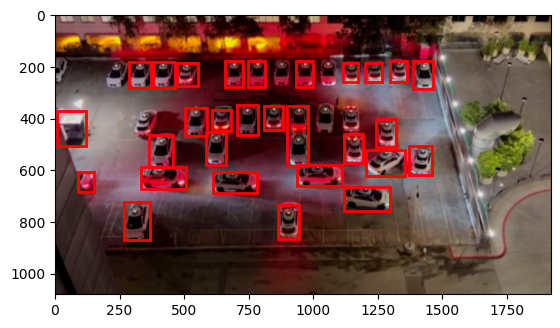

In [181]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
# Convert image to numpy array for plotting
img_np = np.array(image)

fig, ax = plt.subplots(1)
ax.imshow(img_np)

# Draw each filtered bounding box
for box in filtered_boxes:
    x_min, y_min, x_max, y_max = box.cpu().numpy()
    rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()
